<a href="https://colab.research.google.com/github/TimWang318/numerical-analysis/blob/main/%E7%A9%8D%E5%88%86_%E6%A2%AF%E5%BD%A2%E6%B3%95%E8%88%87%E4%B8%AD%E9%BB%9E%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib numpy

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Last trapezoidal approximation: 6.206463271460469
Last midpoint approximation: 6.196768460186769


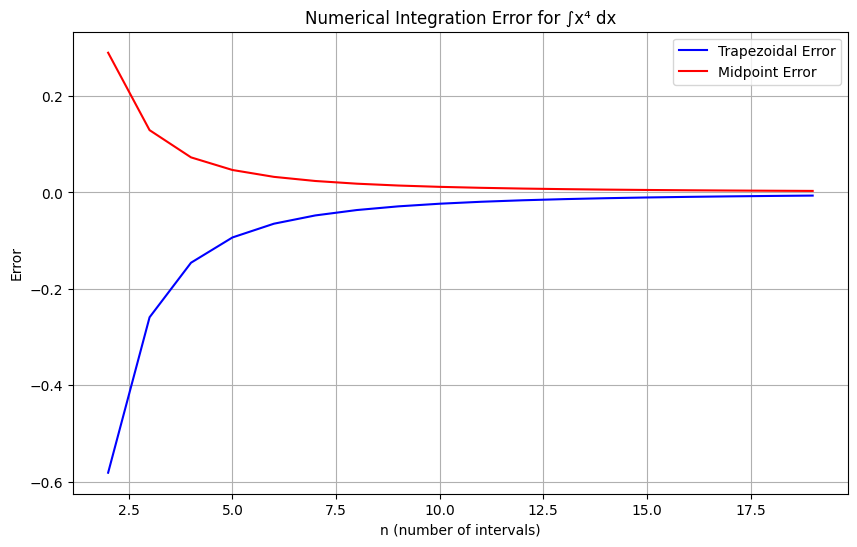

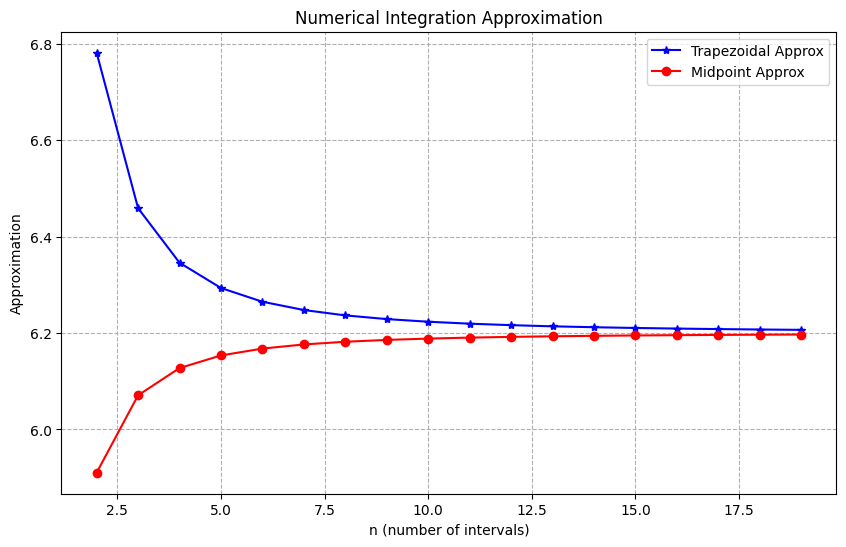

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 積分下限與上限 / Lower and upper limits of integration
a = 1  # 下限 lower bound
b = 2  # 上限 upper bound

# 定義被積分的函數 f(x) = x^4 / Define the function to integrate
def f(x):
    return x**4

# 定義函數的二階導數 f''(x) = 12x^2 / Define the second derivative of f(x)
def ddf(x):
    return 12*x**2

# 梯形數值積分實作函數（包含截斷誤差估算）/ Trapezoidal rule with truncation error
def taper(f, a, b, n):
    h = (b - a) / n  # 寬度
    taper_s = 0.0        # 總面積初始化
    for i_t in range(n):
        x0 = a + i_t * h         # 每段左端點
        x1 = a + (i_t + 1) * h     # 每段右端點
        top = f(x0)             # 上底：左端函數值
        bottom = f(x1)           # 下底：右端函數值
        area_t = (top + bottom) / 2 * h  # 面積公式：上底+下底 * 高 / 2
        taper_s += area_t               # 加總每段的面積
    return taper_s

# 中點法數值積分實作函數（包含截斷誤差估算）/ Midpoint rule with truncation error
def mid(f, a, b, n):
    x = np.linspace(a, b, n+1)  # 把 [a, b] 等分成 n 個區間 / Divide [a,b] into n intervals
    h = float((b - a) / n)   # 每個區間的寬度 / Width of each interval
    mid_s = 0.0          # 儲存積分總和 / Accumulator for integration
    area_m = 0.0 # Initialize area_m

    for i_m in range(n):
        mk = float((x[i_m+1] + x[i_m]) / 2)  # 計算每個區間的中點 / Midpoint of each subinterval
        area_m += f(mk)                       # 將函數值加總 / Add function value at midpoint


    mid_s = area_m * h  # 最終積分值為總和乘以區間寬 / Final integral = sum × step size
    return mid_s



# 準備不同區間數進行誤差收斂觀察 / Vary number of intervals to observe error convergence
x_vals = np.arange(2, 20, 1)  # 區間數從2到19 / Number of intervals: 2 to 19

print(x_vals)
tap_error_vals = []            # 儲存實際誤差值 / Store actual error values
mid_error_vals = []            # 儲存實際誤差值 / Store actual error values
tap_anns_vals = []             # 儲存近似積分值 / Store approximate integral values
mid_anns_vals = []             # 儲存近似積分值 / Store approximate integral values

exact_integral = 6.2 # True value of the integral of x^4 from 1 to 2

# 執行每一個區間數的計算 / Loop over all interval counts
for ii in x_vals:
    # 執行中點法並取得結果與截斷誤差 / Perform midpoint rule and get result + truncation error
    tap_ans = taper(lambda x: f(x), a, b, ii)
    mid_ans = mid(lambda x: f(x), a, b, ii)

    # 真實誤差 = 真值 - 近似值 / True error = Exact - Approximation
    tap_error = exact_integral - tap_ans
    mid_error = exact_integral - mid_ans

    tap_error_vals.append(tap_error)
    mid_error_vals.append(mid_error)
    tap_anns_vals.append(tap_ans)  # 紀錄積分值 / Save approximation
    mid_anns_vals.append(mid_ans)  # 紀錄積分值 / Save approximation

# 印出最後一次的近似結果 / Print the final integral value
print(f"Last trapezoidal approximation: {tap_anns_vals[-1]}")
print(f"Last midpoint approximation: {mid_anns_vals[-1]}")


# 畫出誤差與截斷誤差收斂圖 / Plot true error and truncation error
plt.figure(figsize=(10, 6))
plt.plot(x_vals, tap_error_vals, color='blue', label='Trapezoidal Error')  # 實際誤差 / Actual error
plt.plot(x_vals, mid_error_vals, color='red', label='Midpoint Error')  # 實際誤差 / Actual error

plt.xlabel("n (number of intervals)")  # x軸：區間數 / x-axis: number of intervals
plt.ylabel("Error")  # y軸：誤差 / y-axis: error
plt.title("Numerical Integration Error for ∫x⁴ dx")  # 圖標題（修正為 x⁴）/ Title of plot
plt.grid(True)  # 加上格線 / Show grid
plt.legend()    # 顯示圖例 / Show legend
plt.show()      # 顯示圖表 / Display plot

# 畫出積分值隨 n 變化的趨勢 / Plot how the approximate value changes with n
plt.figure(figsize=(10, 6))
plt.plot(x_vals, tap_anns_vals, color='blue', marker='*', label='Trapezoidal Approx')  # 近似值 / Approximated result
plt.plot(x_vals, mid_anns_vals, color='red', marker='o', label='Midpoint Approx')  # 近似值 / Approximated result


plt.xlabel("n (number of intervals)")
plt.ylabel("Approximation")
plt.title("Numerical Integration Approximation")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()